## Raman spectroscopy to screen diabetes using ML tool

**Reference** 
<br>[1..all]  Guevara, E., Torres-Galván, J. C., Ramírez-Elías, M. G., Luevano-Contreras, C., & González, F. J. (2018). Use of Raman spectroscopy to screen diabetes mellitus with machine learning tools. Biomedical Optics Express, 9(10), 4998–5010. https://doi.org/10.1364/BOE.9.004998
<br><br>[2] Lippincott , W. &. W. (2006). Advanced Glycation End Products. Circulation. https://doi.org/10.1161/CIRCULATIONAHA.106.621854

### Scope and Topic understanding
- #### To indicate diabetes by using `Blood Biomarker` or `Analyte` called `advanced glycation end products` with `Raman spectroscopy`
    - In this dataset there are 6 Analyte including
        - 3-deoxyglucosone
        - glyoxal
        - glyoxal-lysine dimer GOLD
        - methylglyoxal
        - methylglyoxal-derived hydroimidazolone MG-H2
        - pentosidine
    <br><br>
    - what is these 6 compound ?**[2]**<br>
    <img src = 'https://www.ahajournals.org/cms/asset/838a5e28-bbae-46fd-8a56-7f87c632167c/13ff1.jpg'>
        - Advanced glycation end products (AGEs) are modifications of proteins or lipids that become nonenzymatically glycated and oxidized after contact with aldose sugars.1,2 Early glycation and oxidation processes result in the formation of Schiff bases and Amadori products. 
### Ideal
- Normally, Raman spec can **ethier** identify the compound or indicating the present of the compound.
- Thus, the height,Intensity or Peak area  of the spectra at **exact** wavenumber ($cm^{-1}$) can tell both concentration and **bond** identification.

### Let begin with our 6 compound spectrum.
# 1. ETL (Extract-Transform-Load)

#### Source of dataset: [here](https://www.kaggle.com/datasets/codina/raman-spectroscopy-of-diabetes?resource=download)

In [118]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split


In [119]:
standard = pd.read_csv('dataset/AGEs.csv')

In [120]:
standard.head()

,AGEsID,Var802,Var803,Var804,Var805,Var806,Var807,Var808,Var809,Var810,...,Var1793,Var1794,Var1795,Var1796,Var1797,Var1798,Var1799,Var1800,Var1801,Var1802
0,ramanShift,800.000000,801.000000,802.000000,803.000000,804.000000,805.000000,806.000000,807.000000,808.000000,...,1791.000000,1792.000000,1793.000000,1794.000000,1795.000000,1796.000000,1797.000000,1798.000000,1799.000000,1800.000000
1,3-deoxyglucosone,0.001791,0.001813,0.001839,0.001868,0.001899,0.001929,0.001956,0.001980,0.002002,...,0.000492,0.000492,0.000495,0.000502,0.000509,0.000516,0.000524,0.000534,0.000543,0.000553
2,glyoxal,0.000220,0.000243,0.000270,0.000299,0.000331,0.000367,0.000405,0.000445,0.000488,...,0.000213,0.000217,0.000222,0.000227,0.000233,0.000240,0.000247,0.000253,0.000256,0.000256
3,GOLD,0.000302,0.000295,0.000288,0.000281,0.000275,0.000268,0.000262,0.000256,0.000251,...,0.000141,0.000142,0.000142,0.000129,0.000128,0.000128,0.000127,0.000127,0.000126,0.000126
4,methylglyoxal,0.003002,0.003058,0.003095,0.003115,0.003121,0.003115,0.003098,0.003072,0.003038,...,-0.000115,-0.000130,-0.000146,-0.000161,-0.000176,-0.000190,-0.000205,-0.000219,-0.000223,-0.000224


In [121]:
standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Columns: 1002 entries, AGEsID to Var1802
dtypes: float64(1001), object(1)
memory usage: 54.9+ KB


In [122]:
standard.describe()

,Var802,Var803,Var804,Var805,Var806,Var807,Var808,Var809,Var810,Var811,...,Var1793,Var1794,Var1795,Var1796,Var1797,Var1798,Var1799,Var1800,Var1801,Var1802
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,114.286622,114.429484,114.572344,114.715203,114.858060,115.000916,115.143771,115.286625,115.429478,115.572330,...,255.857262,256.000119,256.142978,256.285835,256.428694,256.571558,256.714419,256.857279,257.000141,257.142999
std,302.371178,302.749140,303.127104,303.505067,303.883032,304.260997,304.638962,305.016928,305.394895,305.772861,...,676.934319,677.312283,677.690247,678.068212,678.446175,678.824136,679.202099,679.580062,679.958025,680.335989
min,0.000220,0.000231,0.000226,0.000221,0.000215,0.000208,0.000202,0.000195,0.000187,0.000179,...,-0.000115,-0.000130,-0.000146,-0.000161,-0.000176,-0.000190,-0.000205,-0.000219,-0.000223,-0.000224
25%,0.000269,0.000269,0.000279,0.000290,0.000303,0.000318,0.000334,0.000340,0.000314,0.000289,...,0.000052,0.000058,0.000065,0.000072,0.000081,0.000107,0.000109,0.000109,0.000109,0.000109
50%,0.000803,0.000748,0.000693,0.000637,0.000582,0.000527,0.000475,0.000445,0.000488,0.000531,...,0.000141,0.000142,0.000142,0.000129,0.000128,0.000128,0.000144,0.000168,0.000194,0.000192
75%,0.002397,0.002436,0.002467,0.002492,0.002510,0.002522,0.002527,0.002526,0.002520,0.002511,...,0.000353,0.000355,0.000359,0.000365,0.000371,0.000378,0.000386,0.000394,0.000400,0.000405
max,800.000000,801.000000,802.000000,803.000000,804.000000,805.000000,806.000000,807.000000,808.000000,809.000000,...,1791.000000,1792.000000,1793.000000,1794.000000,1795.000000,1796.000000,1797.000000,1798.000000,1799.000000,1800.000000


In [123]:
standard.isna().values.any()

False

#### Now it time to load sample

In [124]:
samp_thumb = pd.read_csv('dataset/thumbNail.csv')
samp_thumb.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,116.4,116.4,116.4,116.4,116.4,116.4,116.4,116.4,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,104.8,104.8,104.8,104.8,104.8,104.8,104.8,104.8,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,72.6,72.6,72.6,72.6,72.6,72.6,72.6,72.6,...,0,0,0,0,0,0,0,0,0,0


In [125]:
print(samp_thumb.info())
print()
print(samp_thumb.isna().values.sum())
# print(samp_thumb.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 3162 entries, patientID to Var3161
dtypes: float64(3002), int64(159), object(1)
memory usage: 518.9+ KB
None

1


In [126]:
samp_earl = pd.read_csv('dataset/earLobe.csv')
samp_earl.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,...,0,0,0,0,0,0,0,0,0,0


In [127]:
print(samp_earl.info())
print()
print(samp_earl.isna().values.sum())
# print(samp_earl.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 3162 entries, patientID to Var3161
dtypes: float64(3002), int64(159), object(1)
memory usage: 518.9+ KB
None

1


In [128]:
samp_inarm = pd.read_csv('dataset/innerArm.csv')
samp_inarm.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,...,0,0,0,0,0,0,0,0,0,0


In [129]:
print(samp_inarm.info())
print()
print(samp_inarm.isna().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 3162 entries, patientID to Var3161
dtypes: float64(3002), int64(159), object(1)
memory usage: 518.9+ KB
None

1


In [130]:
samp_vein = pd.read_csv('dataset/vein.csv')
samp_vein.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,181.8,181.8,181.8,181.8,181.8,181.8,181.8,181.8,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,246.2,246.2,246.2,246.2,246.2,246.2,246.2,246.2,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,164.6,164.6,164.6,164.6,164.6,164.6,164.6,164.6,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,293.8,293.8,293.8,293.8,293.8,293.8,293.8,293.8,...,0,0,0,0,0,0,0,0,0,0


In [131]:
print(samp_vein.info())
print()
print(samp_vein.isna().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 3162 entries, patientID to Var3161
dtypes: float64(3002), int64(159), object(1)
memory usage: 518.9+ KB
None

1


## CONCLUSION ETL
- ### standard solution 
    - group of all interest analyte that can be select for interest area.
    - no NaN value here.
- ### sample
    - Loaded 
    - Nan values is **valid** due to it just invalid structure
    - the waveNo. here is around 3260 but we want just 1000
        - TODO thing

# 2.Test splitting

In [132]:
alldataf = [samp_earl,samp_inarm,samp_thumb,samp_vein]

In [133]:
Xs = []
ys = []

for each_df in alldataf:
    # print(each_df.head())
    n = each_df[1:].to_numpy()
    m = n[:,2:].astype(float)
    X = m[:,800:1800]
    Xs.append(X)
    y = each_df.has_DM2.to_numpy()[1:]
    ys.append(y)
    all_Xsample = m
    

In [134]:
len(Xs),len(ys),len(X),len(y)

(4, 4, 20, 20)

In [135]:
seed_rand = 112
X_train0, X_test0, y_train0, y_test0 = train_test_split( Xs[0], ys[0], test_size=0.2, random_state=seed_rand)
X_train1, X_test1, y_train1, y_test1 = train_test_split( Xs[1], ys[1], test_size=0.2, random_state=seed_rand)
X_train2, X_test2, y_train2, y_test2 = train_test_split( Xs[2], ys[2], test_size=0.2, random_state=seed_rand)
X_train3, X_test3, y_train3, y_test3 = train_test_split( Xs[3], ys[3], test_size=0.2, random_state=seed_rand)

In [136]:
idx0_0 = np.where(y_train0 == 0 )
idx0_1 = np.where(y_train0 == 1 )

idx1_0 = np.where(y_train1 == 0 )
idx1_1 = np.where(y_train1 == 1 )

idx2_0 = np.where(y_train2 == 0 )
idx2_1 = np.where(y_train2 == 1 )

idx3_0 = np.where(y_train3 == 0 )
idx3_1 = np.where(y_train3 == 1 )



# 2 . EDA
> SELECT interest range

> Apply smoothing

- ### hypothesis
    - Since same compound will have peak at same wavenumber($cm^{-1}$) but different size, we can just select **several of small range** of wavenumber for fitting the model.
    

> data accquire by 20 people and each person get test at 4 different area[1]

- furthur picture how there gather data are [here](https://doi.org/10.1364/BOE.9.004998)

<img src = 'https://opg.optica.org/getImage.cfm?img=QC5sYXJnZSxib2UtOS0xMC00OTk4LWcwMDE'>

In [137]:
'''
std_transpose.head()
'''

'''
samp_thumb_T = samp_thumb.set_index('patientID').transpose()

samp_thumb_T = samp_thumb_T.dropna() # just for plot thing we don need y values yet

sample_shift = samp_thumb_T['ramanShift']

samp_thumb_T.head()
'''

'''

for c in corr:
    print(c)
'''

'''
        # plt.figure(dpi=150,figsize=(10,4))
        # plt.plot(sample_shift,samp_thumb_T['DM203'],c='red',label='patient',alpha=.6)
        # plt.plot(sample_shift,samp_thumb_T['Ctrl03'],c='blue',label='Control(healthy)',alpha=.5)
        # plt.title('sample')
        # plt.xlabel('wavenumber')
        # plt.ylabel('Intensity')
        # plt.xlim((800, 1800))
        # plt.ylim((0,250))
        # plt.legend()
        # plt.show()
'''

'''
plt.figure(dpi=150)
plt.plot(sample_shift,samp_thumb_T['DM201'],c='red')
plt.title('PLOT full sample with diabetes')
plt.xlabel('wavenumber')
plt.ylabel('Intensity')
# plt.xlim((800, 1800))
plt.show()
'''

"\nplt.figure(dpi=150)\nplt.plot(sample_shift,samp_thumb_T['DM201'],c='red')\nplt.title('PLOT full sample with diabetes')\nplt.xlabel('wavenumber')\nplt.ylabel('Intensity')\n# plt.xlim((800, 1800))\nplt.show()\n"

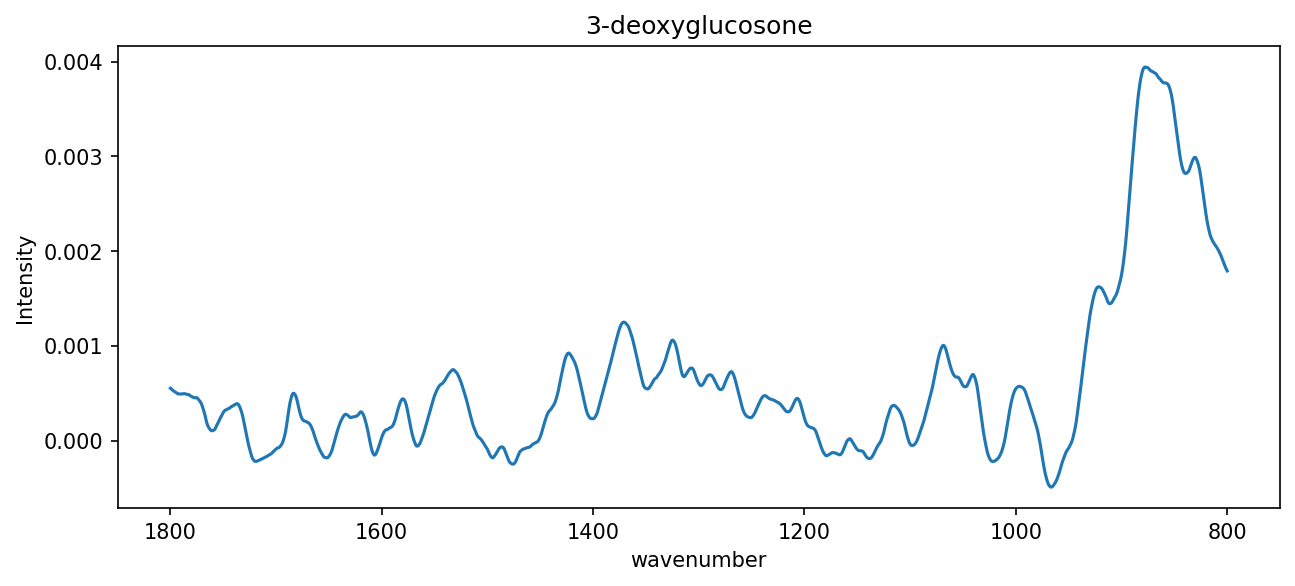

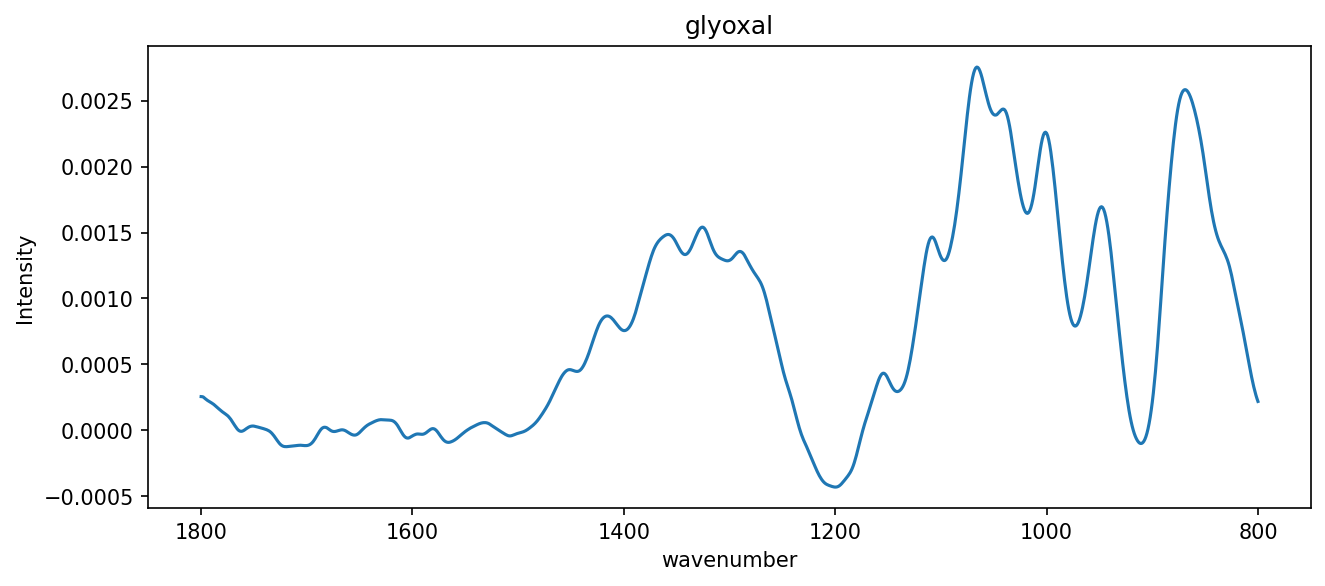

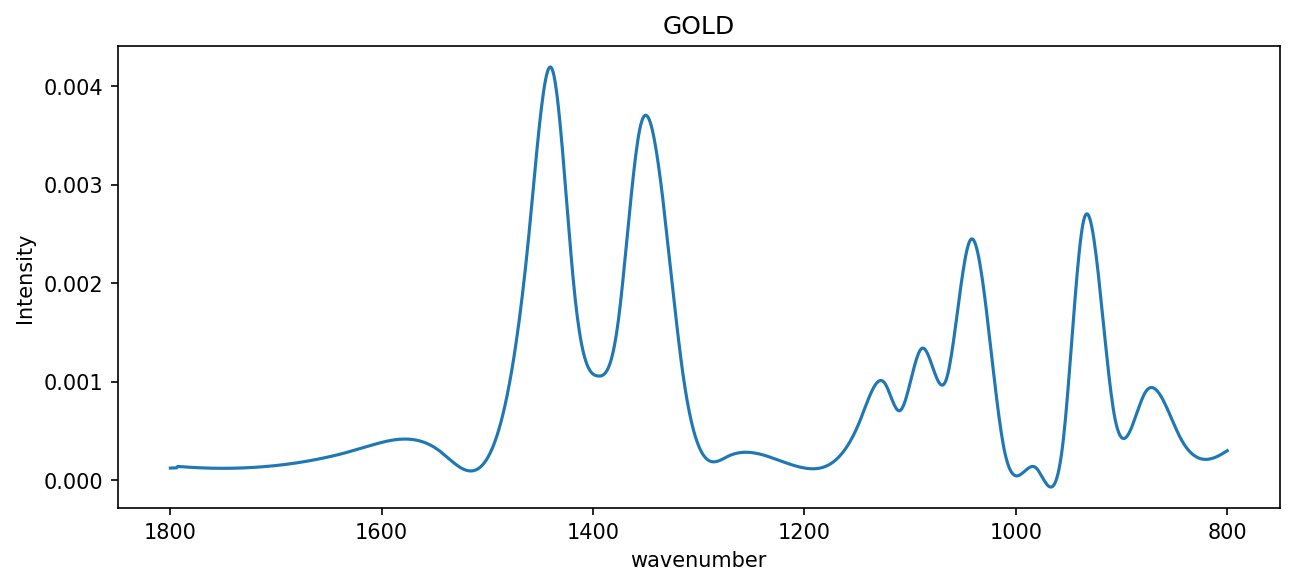

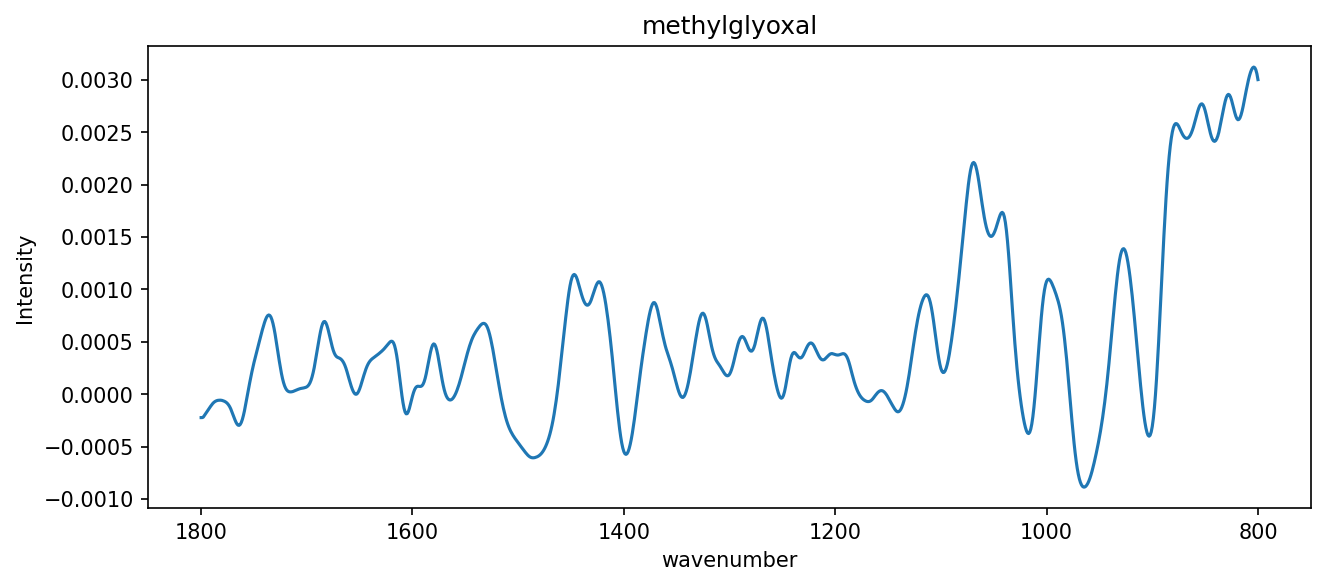

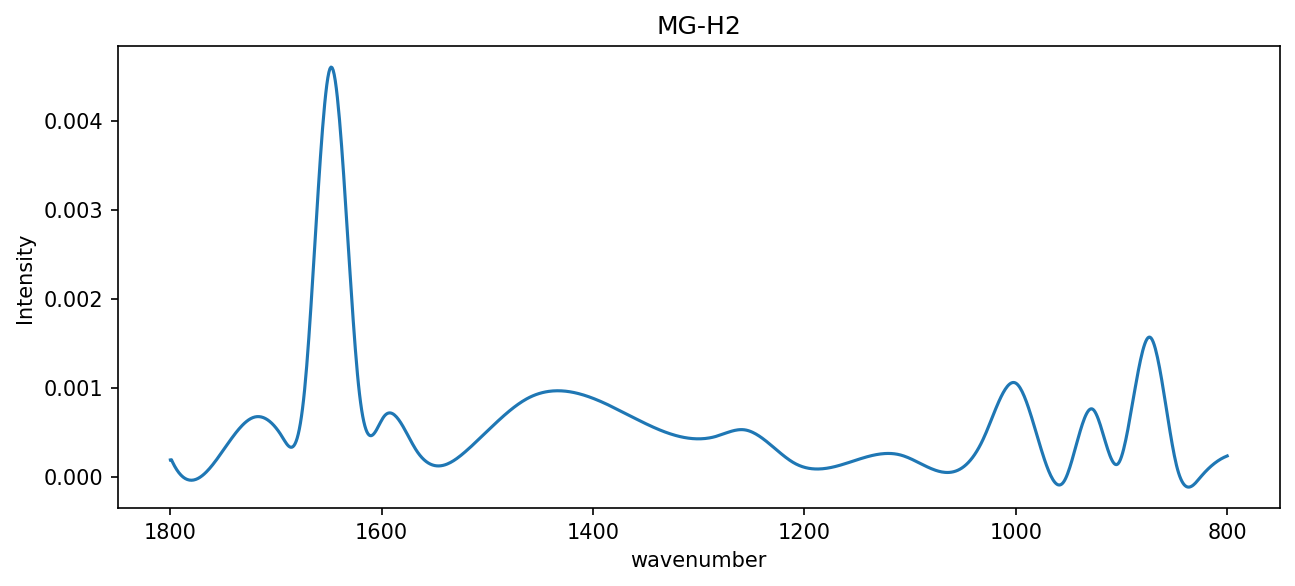

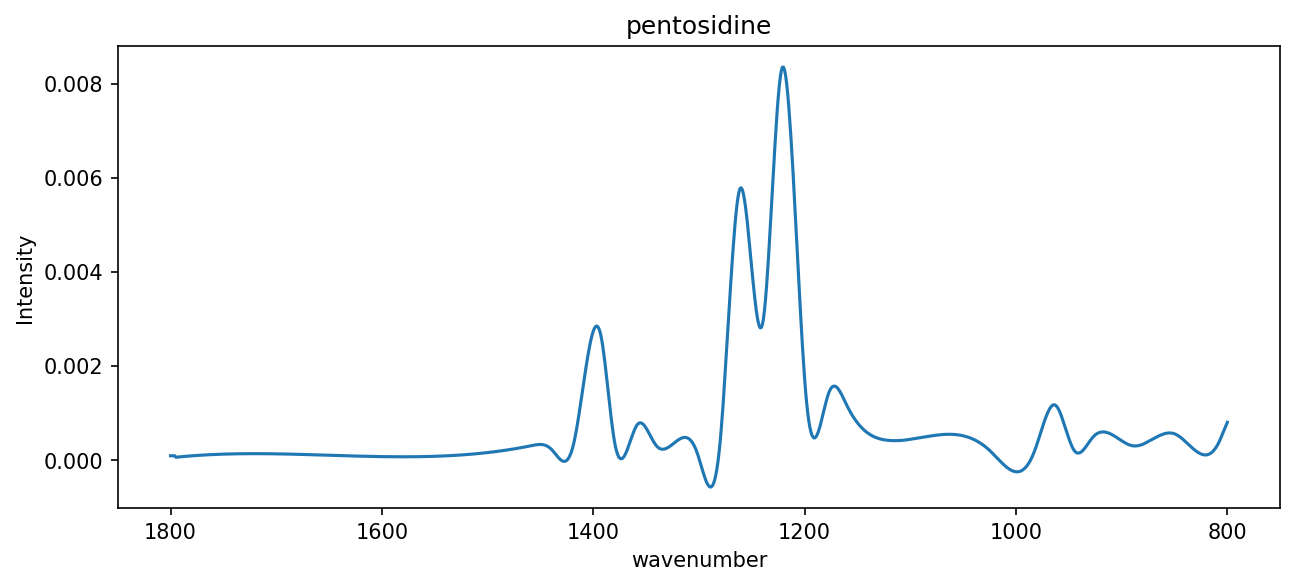

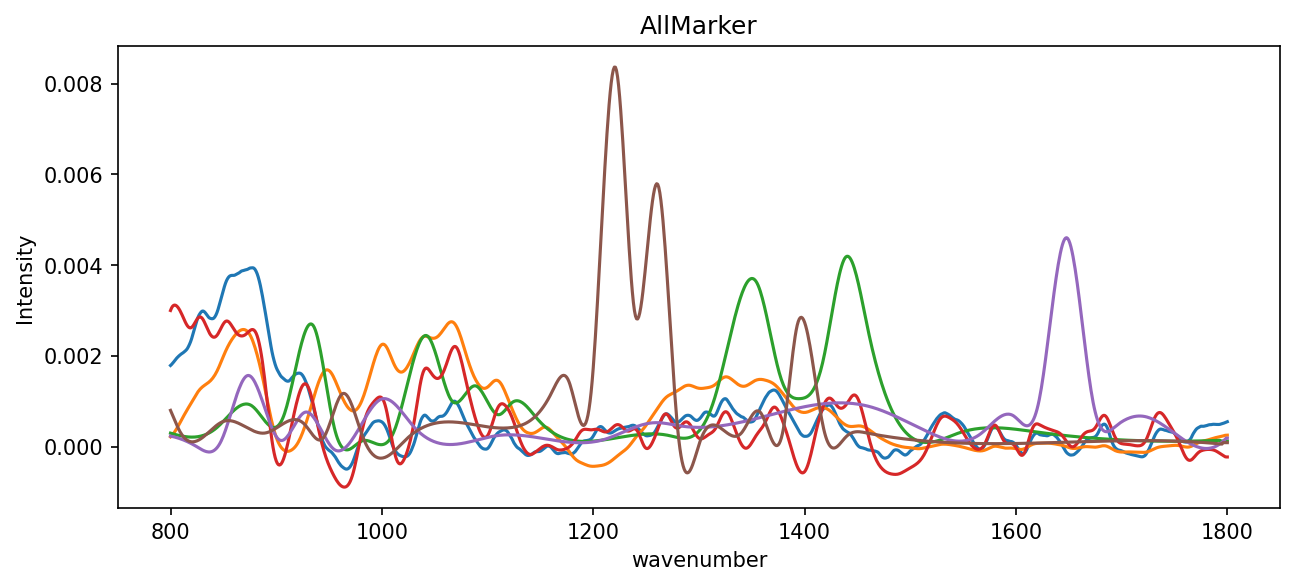

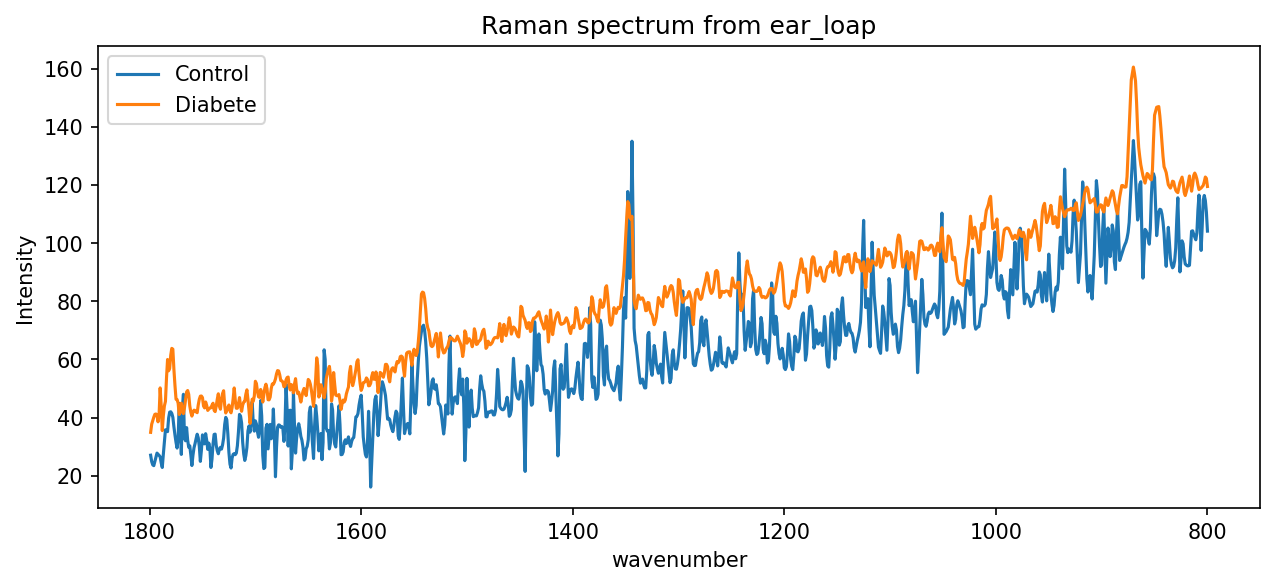

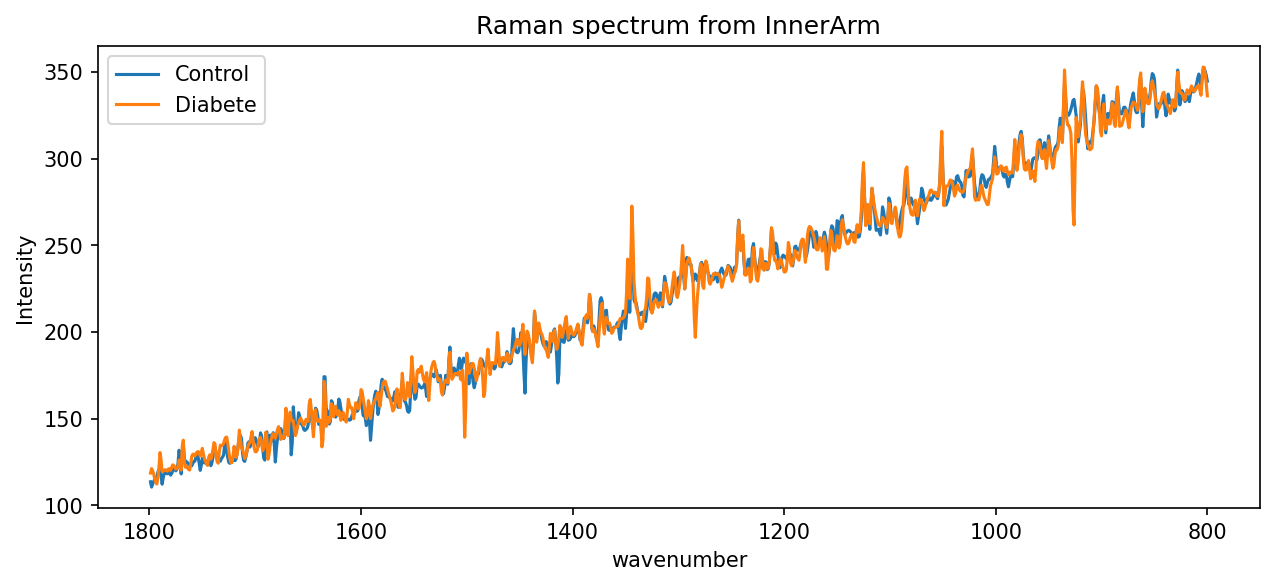

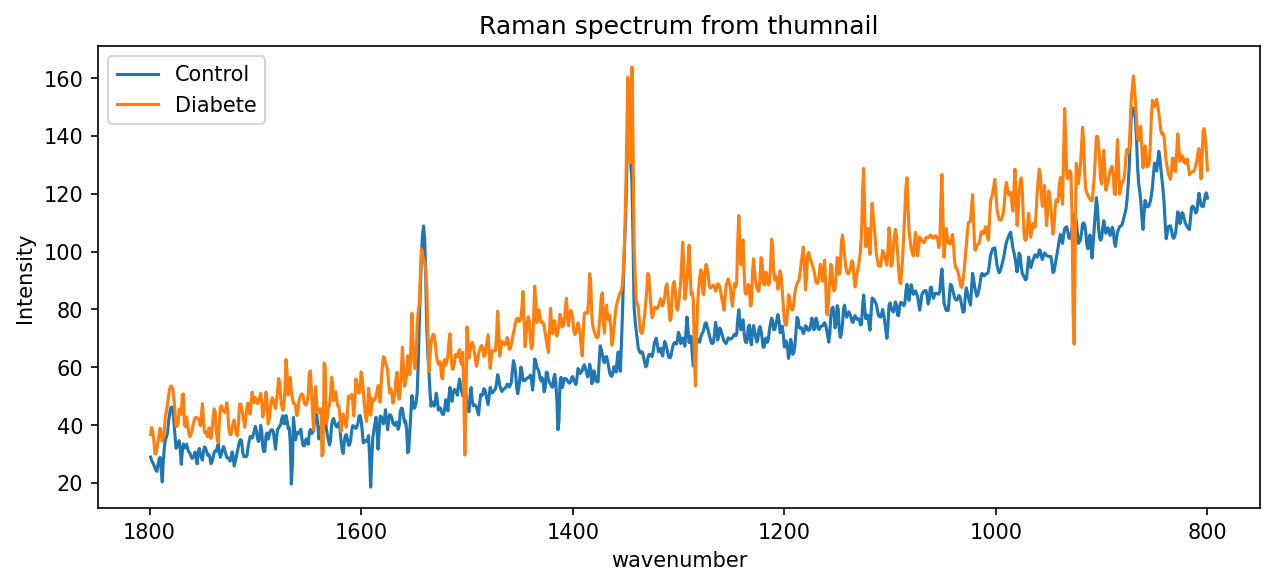

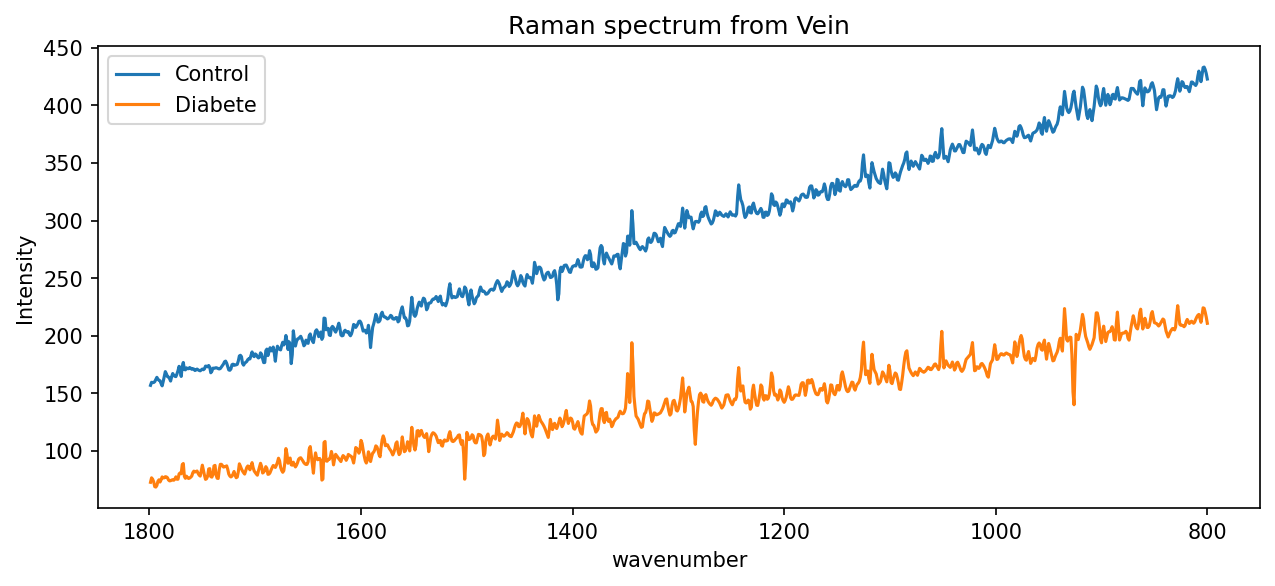

In [138]:
std_transpose = standard.set_index('AGEsID').transpose()
corr = std_transpose.columns
shift = std_transpose['ramanShift']


for c in corr:
    if c != 'ramanShift':
        plt.figure(dpi=150,figsize=(10,4))
        plt.plot(shift,std_transpose[c])
        plt.title(c)
        plt.xlabel('wavenumber')
        plt.ylabel('Intensity')
        plt.gca().invert_xaxis()
        plt.show()


plt.figure(dpi=150,figsize=(10,4))

for c in corr:
    if c != 'ramanShift':
        plt.plot(shift,std_transpose[c])
        plt.title('AllMarker')
        plt.xlabel('wavenumber')
        plt.ylabel('Intensity')
        plt.gca().invert_xaxis()


plt.show()


test_location = ['ear_loap','InnerArm','thumnail','Vein']
healtly_idx = [idx0_0,idx1_0,idx2_0,idx3_0]


patient_idx = [idx0_1,idx1_1,idx2_1,idx3_1]

X_trainall = [X_train0,X_train1,X_train2,X_train3]

for c,Xn_train,ehealt_idx,epat_idx in zip(test_location,X_trainall,healtly_idx,patient_idx):
    plt.figure(dpi=150,figsize=(10,4))

    plt.plot(shift[:-1],Xn_train[ehealt_idx][0],label = 'Control')
    
    plt.plot(shift[:-1],Xn_train[epat_idx][0],label= 'Diabete')
    plt.title(f'Raman spectrum from {c}')
    plt.xlabel('wavenumber')
    plt.ylabel('Intensity')
    plt.gca().invert_xaxis()
    plt.legend()
    plt.show()



## data all from patient without cutting

In [139]:
import random
random.seed(1123)
randnum = random.randint(0,19)

<function matplotlib.pyplot.show(close=None, block=None)>

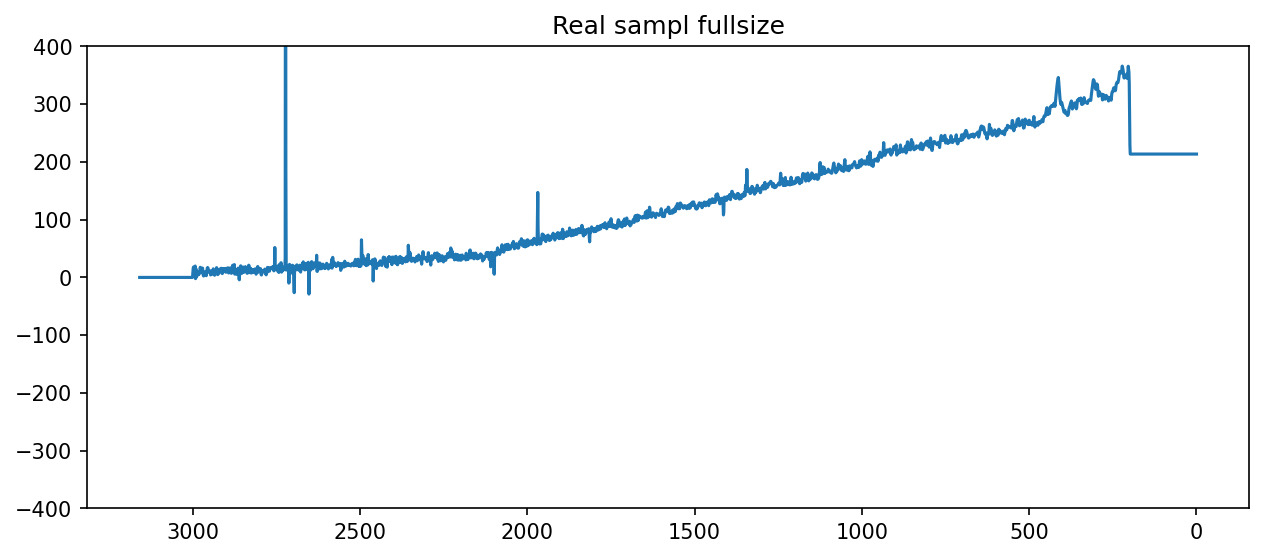

In [140]:
plt.figure(dpi=150,figsize=(10,4))

plt.plot(all_Xsample[randnum])
plt.gca().invert_xaxis()
plt.ylim(-400,400)
plt.title('Real sampl fullsize')
plt.show


### we can see that the fluoresence background which will interfere the result.
### To overcome this problem, we will preprocessing the data using `fuorescence removal`

#### if someone see this markdown, please help me conclude the paper about fuorescence removal.
- Here is the link to paper [here](https://journals.sagepub.com/doi/10.1366/000370207782597003)

In [141]:
from BaselineRemoval import BaselineRemoval


baseObj=BaselineRemoval(all_Xsample[randnum])

Zhangfit_output=baseObj.ZhangFit()

<function matplotlib.pyplot.show(close=None, block=None)>

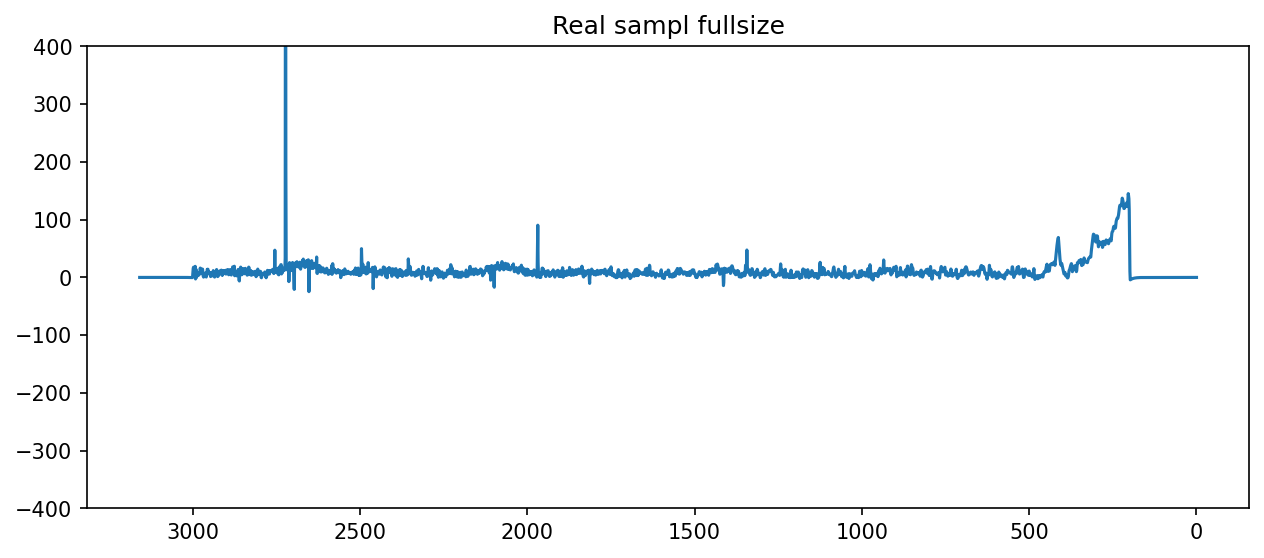

In [143]:
plt.figure(dpi=150,figsize=(10,4))

plt.plot(Zhangfit_output)
plt.gca().invert_xaxis()
plt.ylim(-400,400)
plt.title('Real sampl fullsize')
plt.show

### As a result we now  observe that using algorithm to remove the baseline can result in some error.
### Anyway, our interest range to test is in (1800,800) so it can be overcome.

In [144]:
X_train_VR = []
for X_each_type in X_trainall:
    X_train_each = []
    for each_train in X_each_type:
        baseObj = BaselineRemoval(each_train)
        X_train_each.append(baseObj.ZhangFit())
    X_train_each = np.array(X_train_each)
    X_train_VR.append(X_train_each)


In [145]:
len(X_train_VR),X_train_each.shape

(4, (16, 1000))

## HIDE
<!-- ##### TODO select wavenumber, use average, else
<br>
- we can select or just let the DL model select

<br>

### One problem on the sample spectrogram (signal) -->

In [146]:
'''
# samp_thumb_T_col = samp_thumb_T.columns
# patient_cor = samp_thumb_T_col[1:12]
# control_cor = samp_thumb_T_col[12:]
'''

'''# plt.figure(dpi=150,figsize=(10,4))
# for d in patient_cor:
#     # if c != 'ramanShift':
#     plt.plot(sample_shift,samp_thumb_T[d],c = 'red',label='patient'+d,alpha=.6)
# for c in control_cor:
#     plt.plot(sample_shift,samp_thumb_T[c],c='blue',label='Control(healthy)'+d,alpha=.5)

# plt.title('sample')
# plt.xlabel('wavenumber')
# plt.ylabel('Intensity')
# plt.xlim((800, 1800))
# plt.ylim((0,250))
# plt.legend()
# plt.show()'''



'''plt.figure(dpi=150,figsize=(10,4))
for d in patient_cor:
    # if c != 'ramanShift':
    plt.plot(sample_shift,samp_thumb_T[d],label='patient'+d,alpha=.6)
plt.title('sample')
plt.xlabel('wavenumber')
plt.ylabel('Intensity')
plt.xlim((800, 1800))
plt.ylim((0,250))
plt.legend()
plt.show()

plt.figure(dpi=150,figsize=(10,4))

for c in control_cor:
    plt.plot(sample_shift,samp_thumb_T[c],label='Control(healthy)'+c,alpha=.5)

plt.title('sample')
plt.xlabel('wavenumber')
plt.ylabel('Intensity')
plt.xlim((800, 1800))
plt.ylim((0,250))
plt.legend()
plt.show()'''

"plt.figure(dpi=150,figsize=(10,4))\nfor d in patient_cor:\n    # if c != 'ramanShift':\n    plt.plot(sample_shift,samp_thumb_T[d],label='patient'+d,alpha=.6)\nplt.title('sample')\nplt.xlabel('wavenumber')\nplt.ylabel('Intensity')\nplt.xlim((800, 1800))\nplt.ylim((0,250))\nplt.legend()\nplt.show()\n\nplt.figure(dpi=150,figsize=(10,4))\n\nfor c in control_cor:\n    plt.plot(sample_shift,samp_thumb_T[c],label='Control(healthy)'+c,alpha=.5)\n\nplt.title('sample')\nplt.xlabel('wavenumber')\nplt.ylabel('Intensity')\nplt.xlim((800, 1800))\nplt.ylim((0,250))\nplt.legend()\nplt.show()"

### Prelim conclusion
- Since signal baseline is **not** identical or similar to each other, `Algorithm` to fix these problem is need
- or using **Integration method** I forgot it name maybe something like `Trapezoidal rule` on each peak but we will let the model do by they own.
### EDA Conclusion 
- for each analyte
    - 3-deoxyglucosone -> did not have any interest characteristic
    - glyoxal -> sharing quite the same characteristic with GOLD
    - glyoxal-lysine dimer GOLD -> nice
    - methylglyoxal
    - methylglyoxal-derived hydroimidazolone MG-H2
    - pentosidine

<!-- ##  TO FIX
- If we go with Deeplearning, we can use `Covolutional` and `MaxPooling` to reduce and select wavenumber(feature) for us.
- We also can use manual select where  -->

## Data Prepared to train and test

---------------------------------------------
# LEGACY WORK KEPT here

#### SHOULD NOT concatenate here

In [147]:
'''raise Exception('Should not do this Error')
X_train_all_unstd = np.concatenate((X_train0,X_train1,X_train2,X_train3),axis=0)
y_train_all = np.concatenate((y_train0,y_train1,y_train2,y_train3),axis=0)
X_train_all = sc.fit_transform(X_train_all_unstd)
X_train_all.shape,y_train_all.shape'''

"raise Exception('Should not do this Error')\nX_train_all_unstd = np.concatenate((X_train0,X_train1,X_train2,X_train3),axis=0)\ny_train_all = np.concatenate((y_train0,y_train1,y_train2,y_train3),axis=0)\nX_train_all = sc.fit_transform(X_train_all_unstd)\nX_train_all.shape,y_train_all.shape"

In [148]:
'''device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)'''

"device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')\nprint(device)"

In [149]:
'''raise Exception('lagacy')
ds = TensorDataset(torch.FloatTensor(X_train_all),torch.LongTensor(y_train_all))

train_set, val_set = torch.utils.data.random_split(ds, [50, 14])

batch_size = 5

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_set, 
                                           batch_size=4, 
                                           shuffle=True)'''

"raise Exception('lagacy')\nds = TensorDataset(torch.FloatTensor(X_train_all),torch.LongTensor(y_train_all))\n\ntrain_set, val_set = torch.utils.data.random_split(ds, [50, 14])\n\nbatch_size = 5\n\ntrain_loader = torch.utils.data.DataLoader(dataset=train_set, \n                                           batch_size=batch_size, \n                                           shuffle=True)\n\nval_loader = torch.utils.data.DataLoader(dataset=val_set, \n                                           batch_size=4, \n                                           shuffle=True)"

In [150]:
'''class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()  #super(Model, self)
        self.fc1 = nn.Linear(input_size, hidden_size) 
        #add non-linearity; recall ReLU is max(input, 0) 
        self.snm = nn.Softmax(dim=1)
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.snm(out)
        out = self.fc2(out)
        return out'''

'class NeuralNet(nn.Module):\n    def __init__(self, input_size, hidden_size, num_classes):\n        super(NeuralNet, self).__init__()  #super(Model, self)\n        self.fc1 = nn.Linear(input_size, hidden_size) \n        #add non-linearity; recall ReLU is max(input, 0) \n        self.snm = nn.Softmax(dim=1)\n        self.fc2 = nn.Linear(hidden_size, num_classes)  \n    \n    def forward(self, x):\n        out = self.fc1(x)\n        out = self.snm(out)\n        out = self.fc2(out)\n        return out'

In [151]:
'''model = NeuralNet(1000, 14, 2).to(device)
criterion = nn.CrossEntropyLoss()   
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  '''

'model = NeuralNet(1000, 14, 2).to(device)\ncriterion = nn.CrossEntropyLoss()   \noptimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  '

In [152]:
'''
raise Exception('NO LONGER use Error')
total_step = len(train_loader)  #for printing purpose
num_epochs = 700
for epoch in range(num_epochs):
    for i, (spec, y) in enumerate(train_loader):  
        
        #images shape is [100, 1, 28, 28] [batch_size, channel, height, width]
        
        # Move tensors to the configured device
        # also reshape to [100, 784] so it can be inputted into the Dense layer
        # images = images.reshape(-1, 28*28).to(device)
        spec = spec.to(device)
        y = y.to(device)
                
        # Forward pass
        outputs = model(spec)
        loss = criterion(outputs, y)  #note that outputs shape [batch, num_classes]) while labels shape ([batch, ])
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            sys.stdout.write('\rEpoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    if (epoch) % 50 == 0:
        with torch.no_grad():
            total_val_corr = 0
            for (val_spec, val_label) in val_loader:
                val_spec = val_spec.to(device)
                val_label = val_label.to(device)
                val_yhat = model(val_spec)
                val_loss = criterion(val_yhat, val_label)

                val_predicted = torch.max(val_yhat, 1)[1]
                total_val_corr += (val_predicted == val_label).sum()
            val_acc = (total_val_corr * 100) / len(val_set)
            print(f"    ++++++Validation++++++  Loss: {val_loss:.2f} - Acc: {val_acc:.2f}",end = '\n')
            '''

'\nraise Exception(\'NO LONGER use Error\')\ntotal_step = len(train_loader)  #for printing purpose\nnum_epochs = 700\nfor epoch in range(num_epochs):\n    for i, (spec, y) in enumerate(train_loader):  \n        \n        #images shape is [100, 1, 28, 28] [batch_size, channel, height, width]\n        \n        # Move tensors to the configured device\n        # also reshape to [100, 784] so it can be inputted into the Dense layer\n        # images = images.reshape(-1, 28*28).to(device)\n        spec = spec.to(device)\n        y = y.to(device)\n                \n        # Forward pass\n        outputs = model(spec)\n        loss = criterion(outputs, y)  #note that outputs shape [batch, num_classes]) while labels shape ([batch, ])\n        \n        # Backward and optimize\n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\n        \n        if (i+1) % 2 == 0:\n            sys.stdout.write(\'\rEpoch [{}/{}], Step [{}/{}], Loss: {:.4f}\' \n                   .

# LEGACY work END here 
## Reason : spectrum from difference area should not be merge together
----------------------------------------------------------------------


# Continue

## without CONCAT ALL data together

In [267]:
import torch
from torch.utils.data import TensorDataset
import torch
from torch import nn
import numpy as np
import sys
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from torch.utils.data import TensorDataset


In [268]:
MINMX = True
if MINMX:
    sc0 = MinMaxScaler()
    sc1 = MinMaxScaler()
    sc2 = MinMaxScaler()
    sc3 = MinMaxScaler()
else:
    sc0 = StandardScaler()
    sc1 = StandardScaler()
    sc2 = StandardScaler()
    sc3 = StandardScaler()

## This part I am not quite sure yet that is this need to be normalize by each spectrum or avg spectrum

In [269]:
PREPROCESS = True
FITBYSPECTRUM = True

if PREPROCESS:
    X_train0,X_train1,X_train2,X_train3 = X_train_VR
else :
    X_train0,X_train1,X_train2,X_train3 = X_trainall

if FITBYSPECTRUM:
    X_train0_std = sc0.fit_transform(X_train0.T).T
    X_train1_std = sc1.fit_transform(X_train1.T).T
    X_train2_std = sc2.fit_transform(X_train2.T).T
    X_train3_std = sc3.fit_transform(X_train3.T).T
else:
    X_train0_std = sc0.fit_transform(X_train0)
    X_train1_std = sc1.fit_transform(X_train1)
    X_train2_std = sc2.fit_transform(X_train2)
    X_train3_std = sc3.fit_transform(X_train3)

### Sent train data to torch

<function matplotlib.pyplot.show(close=None, block=None)>

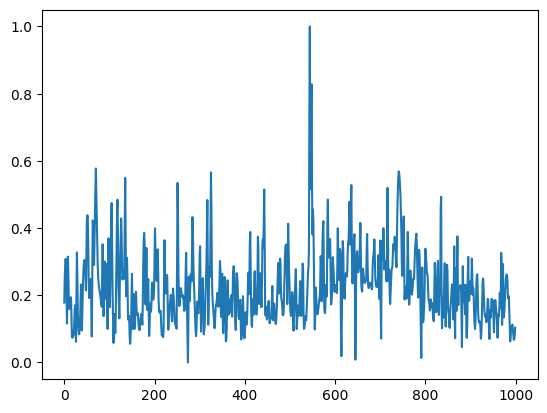

In [270]:
plt.plot(X_train0_std[0])
plt.show

In [271]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [272]:
ds_earloop = TensorDataset(torch.FloatTensor(X_train0_std),torch.LongTensor(y_train0))
ds_inarm = TensorDataset(torch.FloatTensor(X_train1_std),torch.LongTensor(y_train0))
ds_thumbnail = TensorDataset(torch.FloatTensor(X_train2_std),torch.LongTensor(y_train0))
ds_vain = TensorDataset(torch.FloatTensor(X_train3_std),torch.LongTensor(y_train0))

train_set0, val_set0 = torch.utils.data.random_split(ds_earloop, [10, 6])

In [273]:
batch_size = 10
valbatch_size = 6

In [274]:
train_loader0 = torch.utils.data.DataLoader(dataset=train_set0, 
                                           batch_size=batch_size, 
                                           shuffle=True)

val_loader0 = torch.utils.data.DataLoader(dataset=val_set0, 
                                           batch_size=valbatch_size, 
                                           shuffle=True)

In [275]:
import torch
# from torchvision import transforms
from torch import nn
import numpy as np
import sys

## Modeling
- ##  1) Simple ANN 

In [276]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()  #super(Model, self)
        self.fc1 = nn.Linear(input_size, hidden_size) 
        #add non-linearity; recall ReLU is max(input, 0) 
        self.snm = nn.Softmax(dim=1)
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.snm(out)
        out = self.fc2(out)
        return out

In [277]:
model = NeuralNet(1000, 14, 2).to(device)

In [278]:
model

NeuralNet(
  (fc1): Linear(in_features=1000, out_features=14, bias=True)
  (snm): Softmax(dim=1)
  (fc2): Linear(in_features=14, out_features=2, bias=True)
)

In [279]:
criterion = nn.CrossEntropyLoss()   
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  

### model for each ( version not mesh data together)

In [280]:
model_for_each = NeuralNet(1000, 14, 2).to(device)
criterion = nn.CrossEntropyLoss()   
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  

In [281]:
total_step = len(train_loader0)  #for printing purpose
num_epochs = 10000
for epoch in range(num_epochs):
    for i, (spec, y) in enumerate(train_loader0):  
        

        spec = spec.to(device)
        y = y.to(device)
                
        # Forward pass
        outputs = model(spec)
        loss = criterion(outputs, y)  
       
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i) % 2 == 0:
            sys.stdout.write('\rEpoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    if (epoch) % 50 == 0:
        with torch.no_grad():
            total_val_corr = 0
            for (val_spec, val_label) in val_loader0:
                val_spec = val_spec.to(device)
                val_label = val_label.to(device)
                val_yhat = model(val_spec)
                val_loss = criterion(val_yhat, val_label)

                val_predicted = torch.max(val_yhat, 1)[1]
                total_val_corr += (val_predicted == val_label).sum()
            val_acc = (total_val_corr * 100) / len(val_set0)
            print(f"    ++++++Validation++++++  Loss: {val_loss:.2f} - Acc: {val_acc:.2f}",end = '\n')

Epoch [1/10000], Step [1/1], Loss: 0.6896    ++++++Validation++++++  Loss: 0.70 - Acc: 33.33
Epoch [51/10000], Step [1/1], Loss: 0.6812    ++++++Validation++++++  Loss: 0.71 - Acc: 33.33
Epoch [101/10000], Step [1/1], Loss: 0.6711    ++++++Validation++++++  Loss: 0.71 - Acc: 33.33
Epoch [151/10000], Step [1/1], Loss: 0.6591    ++++++Validation++++++  Loss: 0.70 - Acc: 33.33
Epoch [201/10000], Step [1/1], Loss: 0.6470    ++++++Validation++++++  Loss: 0.70 - Acc: 33.33
Epoch [251/10000], Step [1/1], Loss: 0.6355    ++++++Validation++++++  Loss: 0.69 - Acc: 33.33
Epoch [301/10000], Step [1/1], Loss: 0.6249    ++++++Validation++++++  Loss: 0.69 - Acc: 33.33
Epoch [351/10000], Step [1/1], Loss: 0.6150    ++++++Validation++++++  Loss: 0.69 - Acc: 33.33
Epoch [401/10000], Step [1/1], Loss: 0.6057    ++++++Validation++++++  Loss: 0.68 - Acc: 50.00
Epoch [451/10000], Step [1/1], Loss: 0.5969    ++++++Validation++++++  Loss: 0.68 - Acc: 50.00
Epoch [501/10000], Step [1/1], Loss: 0.5885    ++++++

- ##  2) Simple CNN

In [282]:
torch.set_printoptions(sci_mode=False)
for X_train, y_train in train_loader0:
    print(X_train.reshape(X_train.shape[0],1,-1).shape)
    print(y_train)
    break

torch.Size([10, 1, 1000])
tensor([0, 1, 0, 1, 1, 0, 1, 1, 0, 1])


In [262]:
class RamConv1d(nn.Module):
    def __init__(self, input_size = 1, hidden_size=50,linear_hidden=14, out_size=2):
        super().__init__()
        self.conv1d   = nn.Conv1d(input_size, hidden_size, kernel_size = 3)
        self.linear1 = nn.Linear(49900, linear_hidden) #taking the last hidden state
        self.linear2 = nn.Linear(linear_hidden, out_size)
        
    def forward(self, seq):
        #seq shape: (10, 1, 1000)
        out = self.conv1d(seq)
        #out shape: (10, 50, 998)
        out = out.reshape(seq.size(0), -1)
        # print(out.shape)
        out = self.linear1(out)
        out = self.linear2(out)
        return out

In [287]:
model = RamConv1d().to(device)
criterion = nn.CrossEntropyLoss()   
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  

In [288]:
model

RamConv1d(
  (conv1d): Conv1d(1, 50, kernel_size=(3,), stride=(1,))
  (linear1): Linear(in_features=49900, out_features=14, bias=True)
  (linear2): Linear(in_features=14, out_features=2, bias=True)
)

In [290]:
total_step = len(train_loader0)  #for printing purpose
num_epochs = 10000
for epoch in range(num_epochs):
    for i, (spec, y) in enumerate(train_loader0):  
        # print(spec.shape)

        spec = spec.reshape(spec.shape[0],1,-1).to(device)
        y = y.to(device)
                
        # Forward pass
        outputs = model(spec)
        loss = criterion(outputs, y)  
       
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i) % 2 == 0:
            sys.stdout.write('\rEpoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    if (epoch) % 1000 == 0:
        with torch.no_grad():
            total_val_corr = 0
            for (val_spec, val_label) in val_loader0:
                val_spec = val_spec.reshape(val_spec.shape[0],1,-1).to(device)
                val_label = val_label.to(device)
                val_yhat = model(val_spec)
                val_loss = criterion(val_yhat, val_label)

                val_predicted = torch.max(val_yhat, 1)[1]
                total_val_corr += (val_predicted == val_label).sum()
            val_acc = (total_val_corr * 100) / len(val_set0)

            print(f"    ++++++Validation++++++  Loss: {val_loss:.2f} - Acc: {val_acc:.2f}",end = '\n')

Epoch [1/10000], Step [1/1], Loss: 0.0024    ++++++Validation++++++  Loss: 1.68 - Acc: 66.67
Epoch [1001/10000], Step [1/1], Loss: 0.0005    ++++++Validation++++++  Loss: 2.11 - Acc: 66.67
Epoch [2001/10000], Step [1/1], Loss: 0.0002    ++++++Validation++++++  Loss: 2.40 - Acc: 50.00
Epoch [3001/10000], Step [1/1], Loss: 0.0001    ++++++Validation++++++  Loss: 2.62 - Acc: 50.00
Epoch [4001/10000], Step [1/1], Loss: 0.0000    ++++++Validation++++++  Loss: 2.82 - Acc: 50.00
Epoch [5001/10000], Step [1/1], Loss: 0.0000    ++++++Validation++++++  Loss: 3.00 - Acc: 50.00
Epoch [6001/10000], Step [1/1], Loss: 0.0000    ++++++Validation++++++  Loss: 3.17 - Acc: 50.00
Epoch [7001/10000], Step [1/1], Loss: 0.0000    ++++++Validation++++++  Loss: 3.34 - Acc: 50.00
Epoch [8001/10000], Step [1/1], Loss: 0.0000    ++++++Validation++++++  Loss: 3.51 - Acc: 50.00
Epoch [9001/10000], Step [1/1], Loss: 0.0000    ++++++Validation++++++  Loss: 3.67 - Acc: 50.00
Epoch [10000/10000], Step [1/1], Loss: 0.00